<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [5]:
import numpy as np
from graphs import *
%load_ext autoreload

word2vec = np.load('russian_nofraglit_SVD_20_dict.npy', allow_pickle=True).item()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
word2vec

{'0': array([ 4.80622540e-02,  8.80454509e-02, -3.60227655e-02, -7.65241557e-03,
         9.33435286e-02,  1.09911392e-01, -3.15774320e-02,  1.33773618e-01,
         1.01525951e-01, -1.45542231e-02,  9.91456954e-02, -1.85413237e-01,
        -7.41126462e-01,  1.38098629e-02, -5.98146905e-01,  6.17738845e-02,
         4.06214597e-01,  3.46881968e+00,  1.03946733e+01, -2.23643836e+01]),
 '02': array([ 0.00113527,  0.00484445, -0.01006952, -0.00503199, -0.00207129,
         0.0039147 , -0.00660753, -0.00052668,  0.00645112, -0.00802089,
        -0.03395772, -0.00522062, -0.00011338,  0.01780218, -0.00189433,
         0.00032371,  0.00648379,  0.0054092 ,  0.01788901, -0.0151482 ]),
 '03': array([ 3.38736946e-04,  5.06782203e-04, -4.18447230e-04, -3.47949247e-04,
        -8.88279059e-05,  1.61001896e-03, -1.93035628e-03,  6.39519570e-04,
         1.66352515e-03,  4.02836315e-04, -2.44564085e-03, -1.39784913e-04,
         6.82173952e-04,  2.38536254e-03, -5.47206337e-04,  5.09898409e-05,
   

In [17]:
from itertools import islice
word2vec100 = dict(islice(word2vec.items(), 1000, 1100))

In [18]:
word2vec100

{'annushka': array([-4.90847075e-07, -1.23868063e-06, -6.56187392e-08, -1.60934571e-06,
         6.07520488e-07, -1.89853211e-07, -1.18781574e-06, -2.32143360e-06,
        -7.10977925e-07,  1.72186317e-07,  5.18259583e-07, -3.24794681e-06,
         2.10125060e-06, -7.30625574e-07, -9.12807840e-06, -2.70096276e-04,
        -3.10328243e-06,  1.78836472e-06,  1.31574133e-06, -9.67179936e-08]),
 'année': array([-3.75245609e-05, -2.80615562e-04,  3.29732074e-04,  9.38552383e-05,
         4.93167972e-05,  2.86012836e-04, -6.26425493e-05,  3.92652510e-05,
        -3.66958436e-04,  5.47071717e-04,  5.40061713e-04, -3.75004236e-04,
         1.70533643e-04,  4.15730119e-04,  4.30253981e-04, -1.42090883e-05,
         3.07800791e-04,  4.74837484e-04,  9.70393843e-04, -4.15006145e-04]),
 'années': array([ 4.62160799e-05, -1.33797490e-05,  4.29098324e-05, -4.59417481e-05,
         2.59498517e-05,  3.27513276e-05,  2.39438150e-05, -8.08244960e-05,
        -1.07826723e-04, -2.60675619e-05, -1.86748479

In [7]:
graph = Graph.from_word2vec(word2vec100)

100%|███████████████████████████████████████| 100/100 [00:00<00:00, 1818.31it/s]


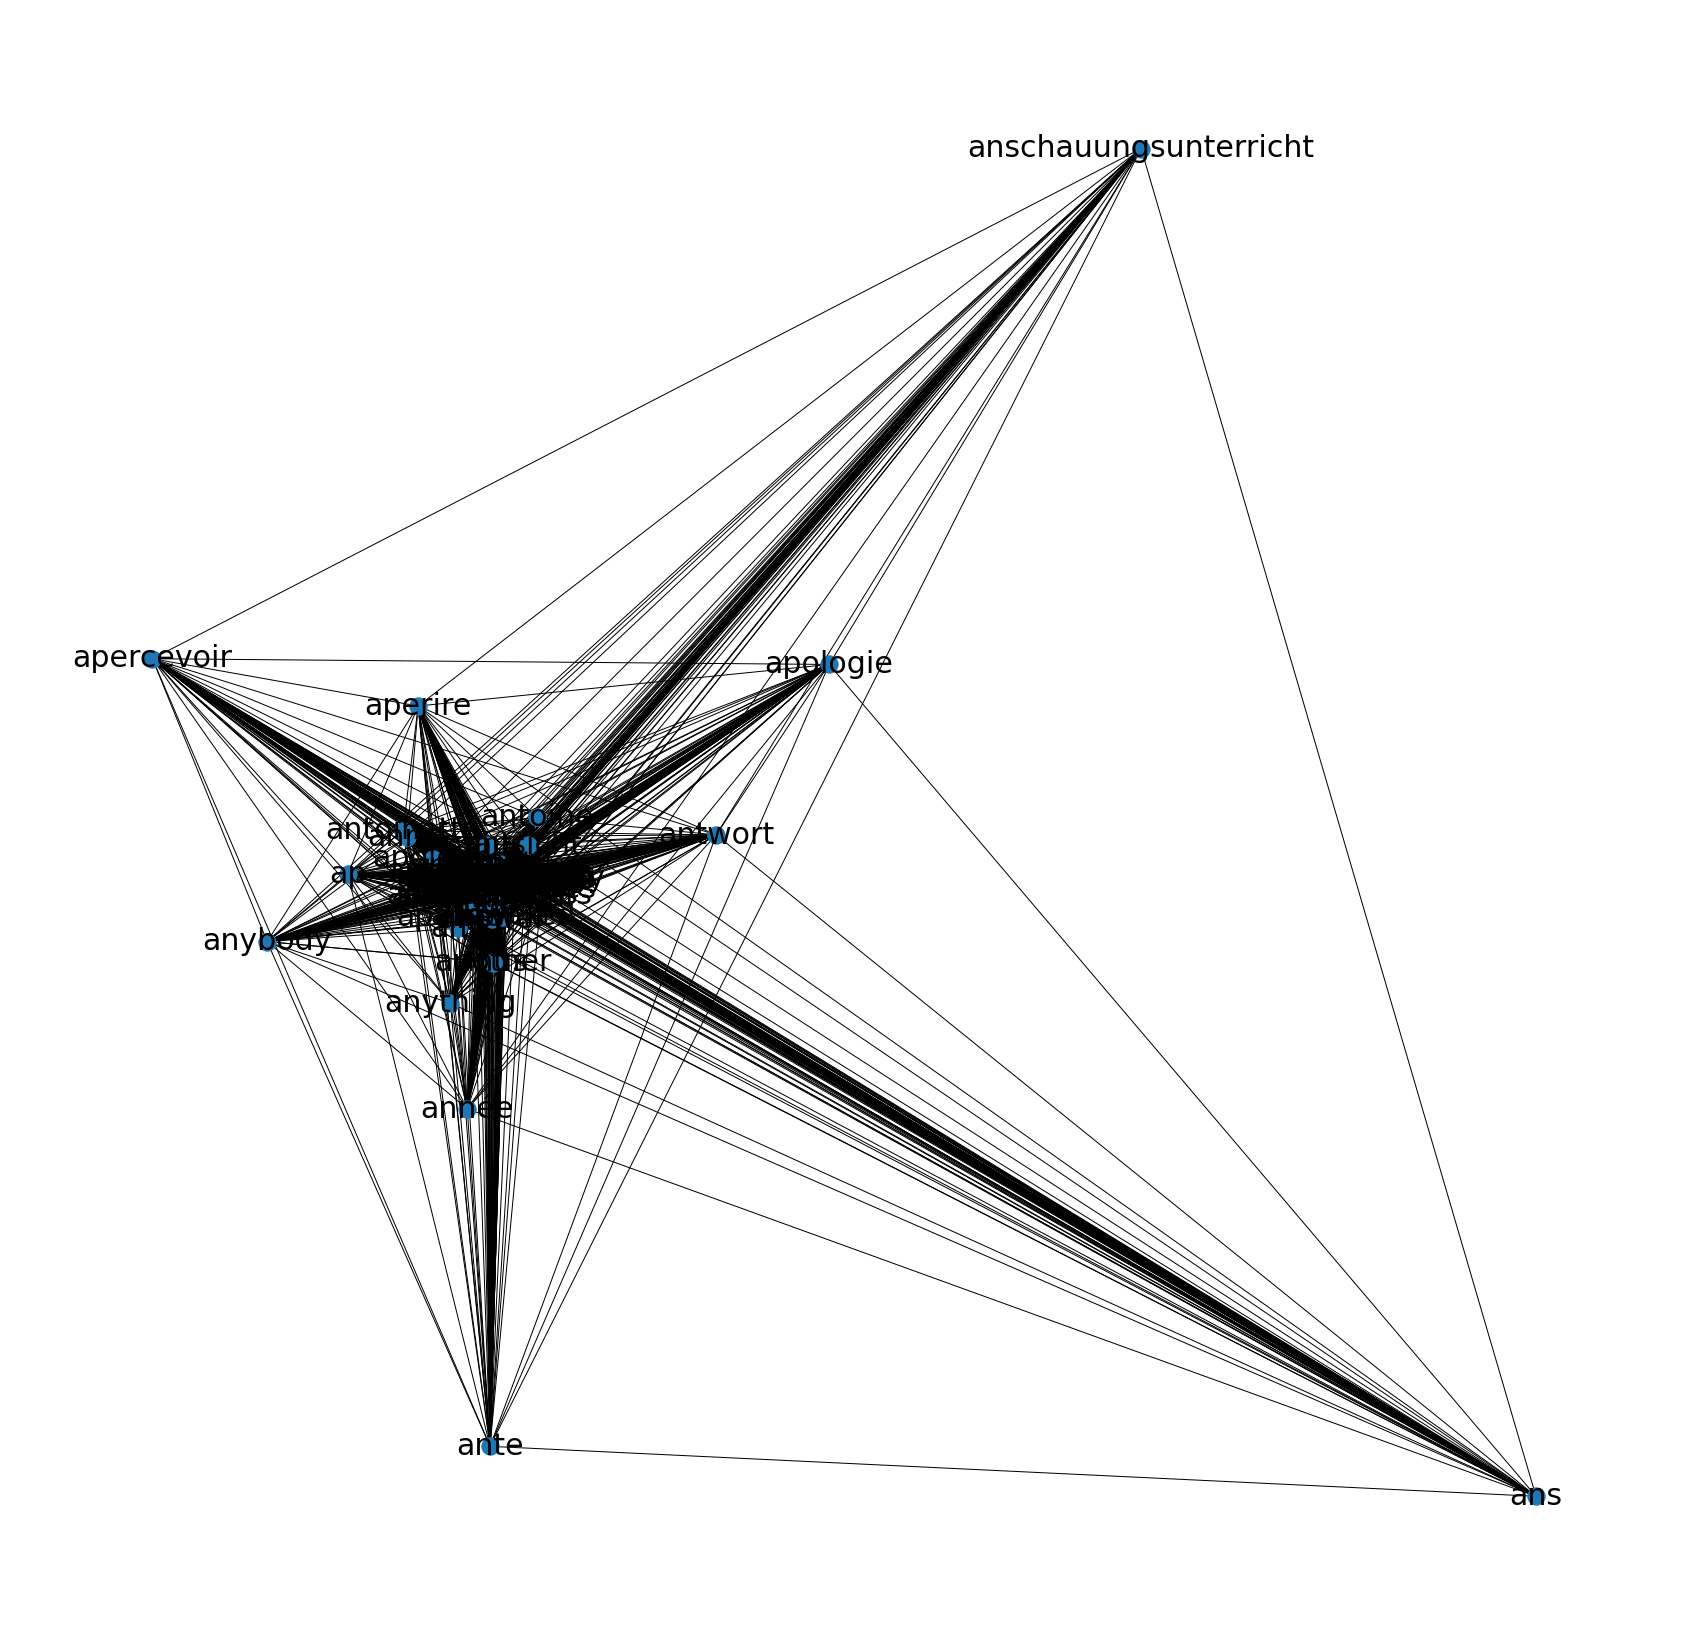

In [8]:
graph = EpsilonGraph.from_word2vec(word2vec100, eps=2e-3, num_cpus=1, k=2)
graph.plot()

100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 47.61it/s]


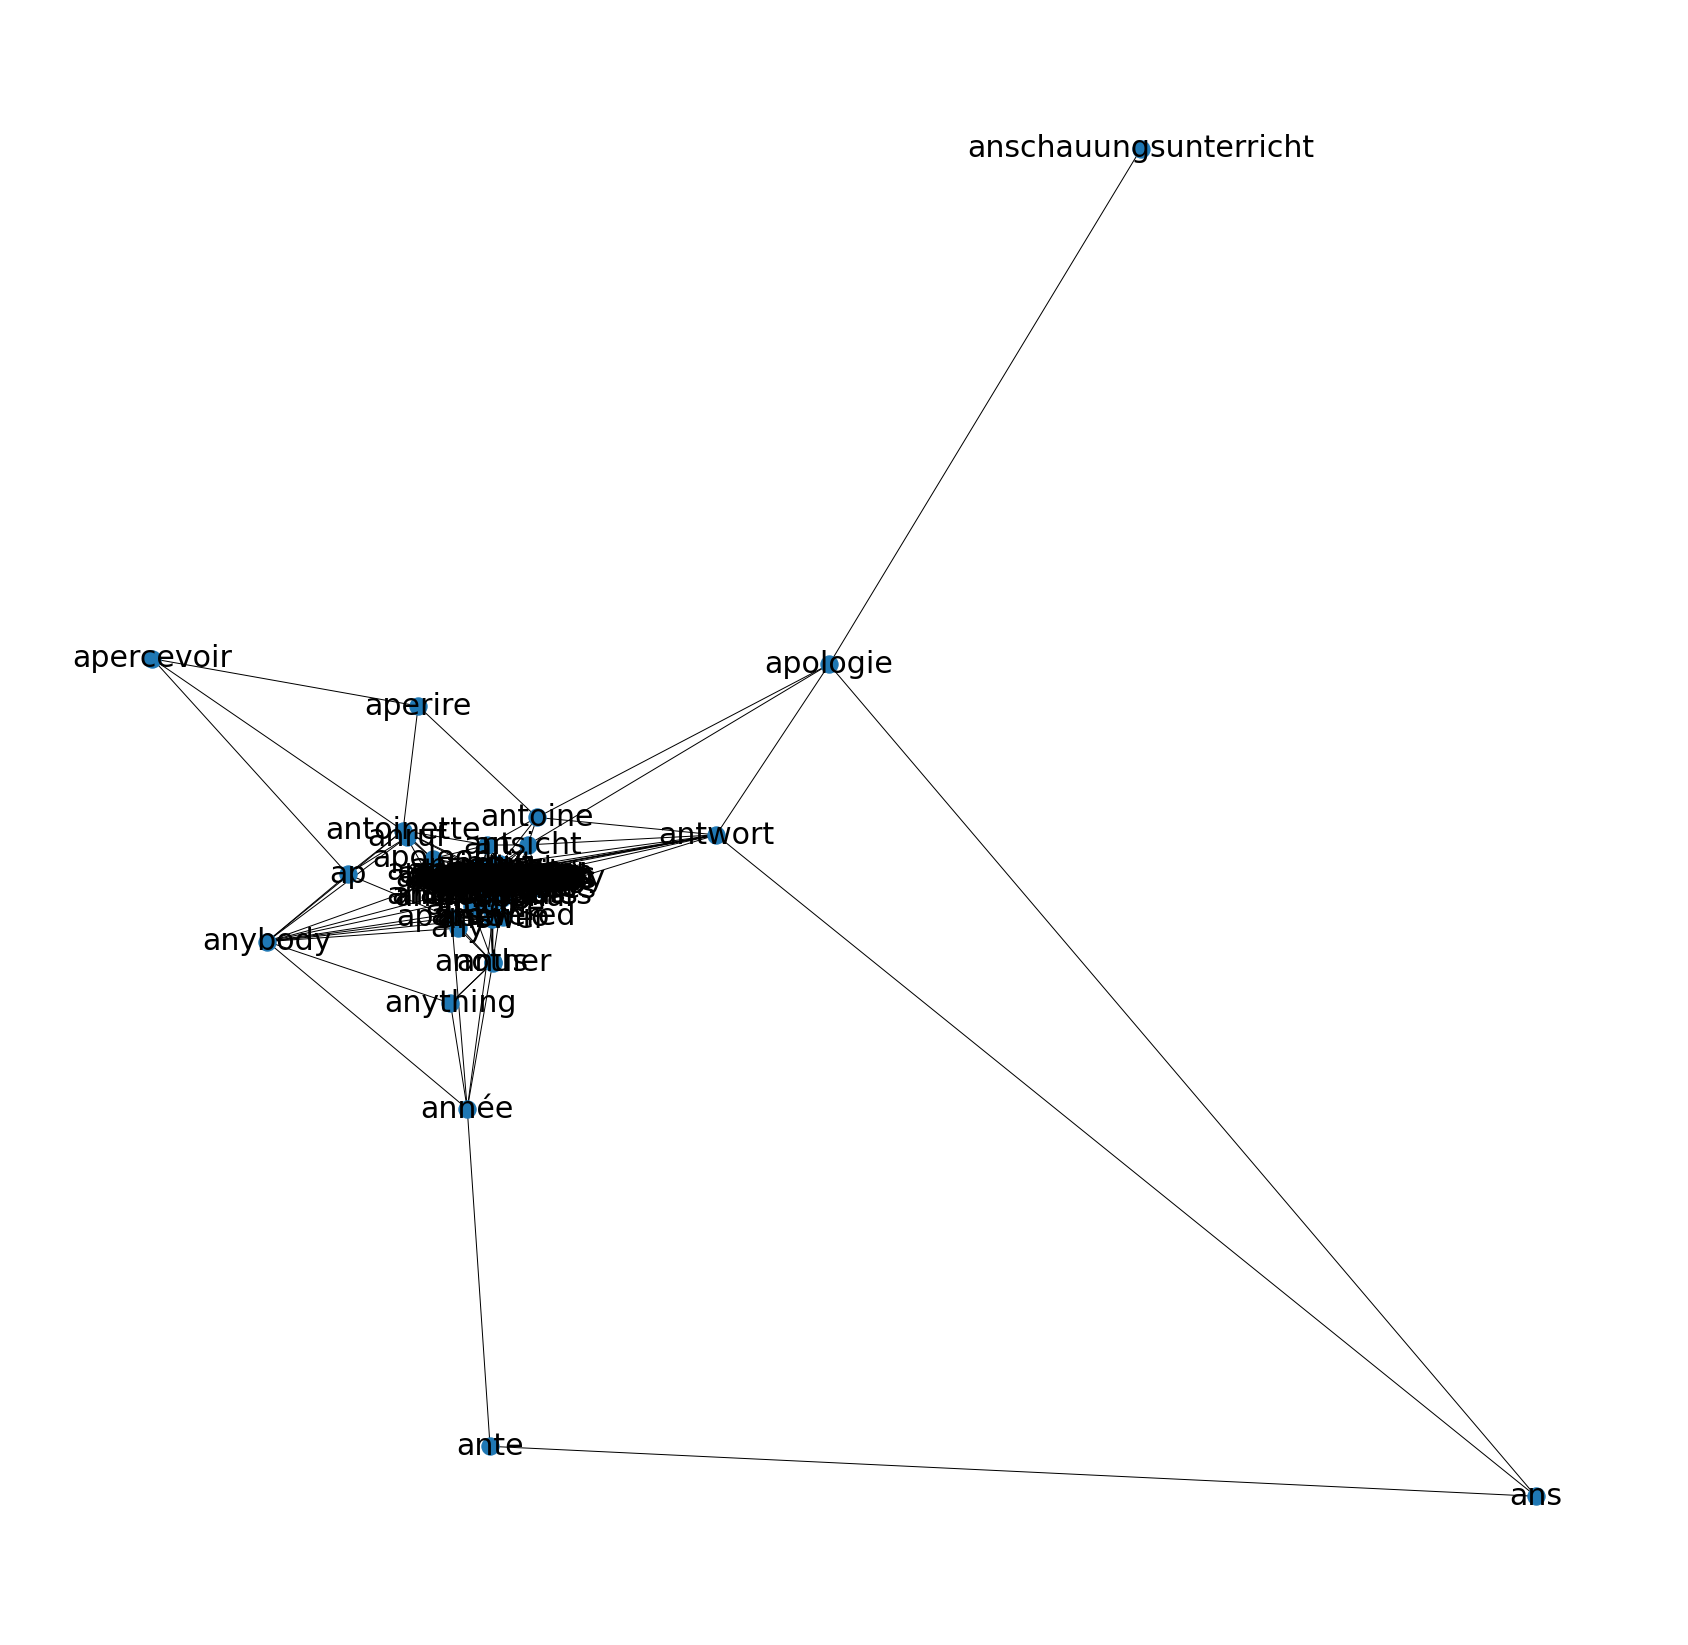

In [10]:
graph = GabrielGraph.from_word2vec(word2vec100, num_cpus=1, k=2)
save(graph, 'gg.pickle')
graph.plot()

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 709.28it/s]


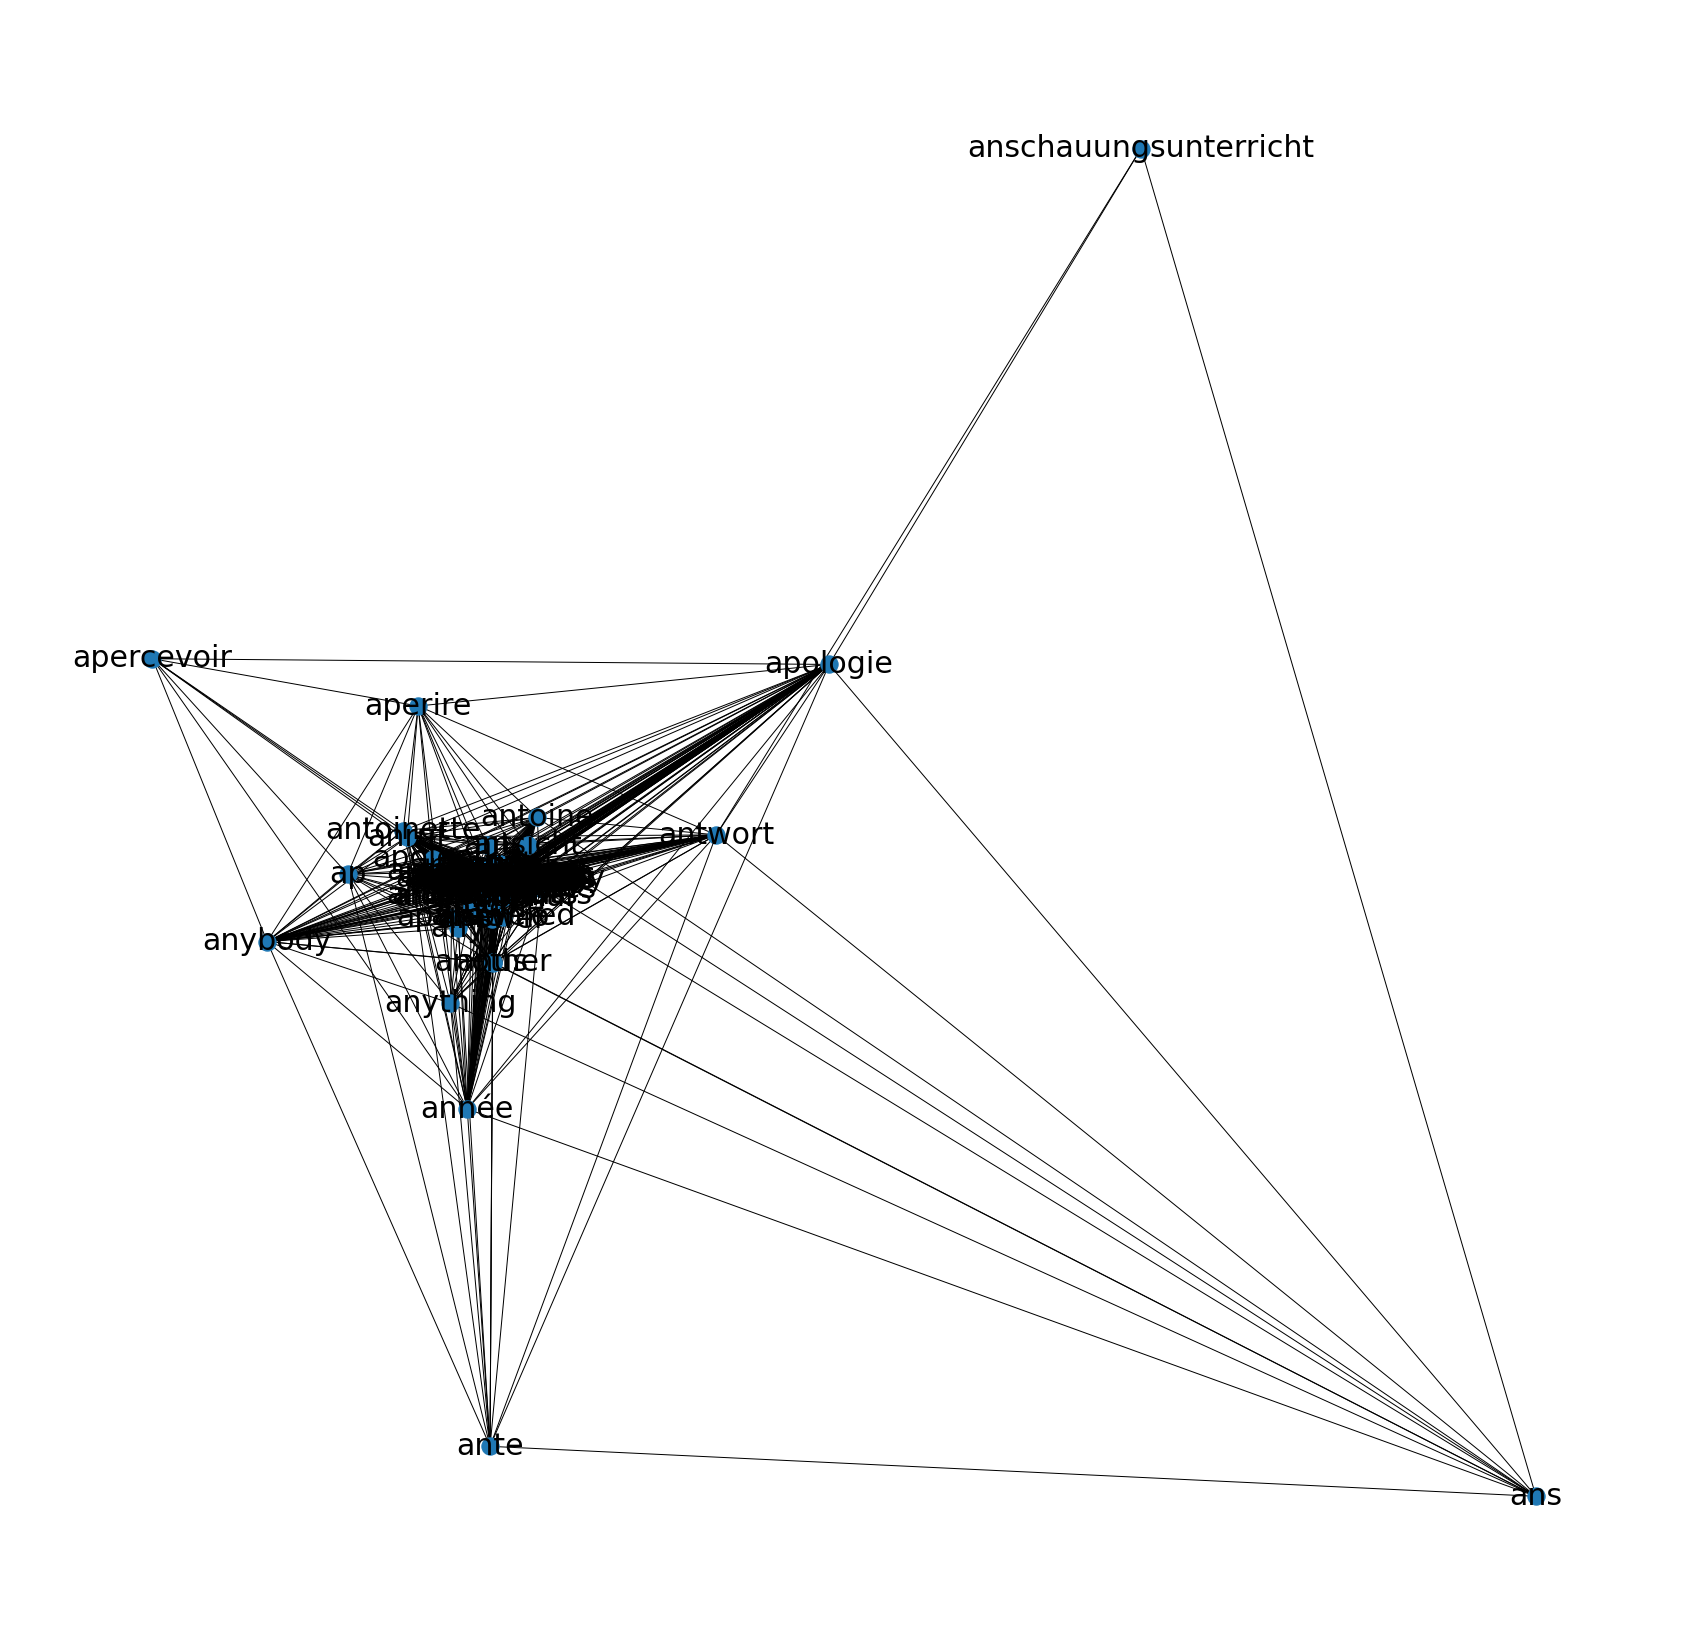

In [11]:
graph = InfluenceGraph.from_word2vec(word2vec100, k=2)
graph.plot()

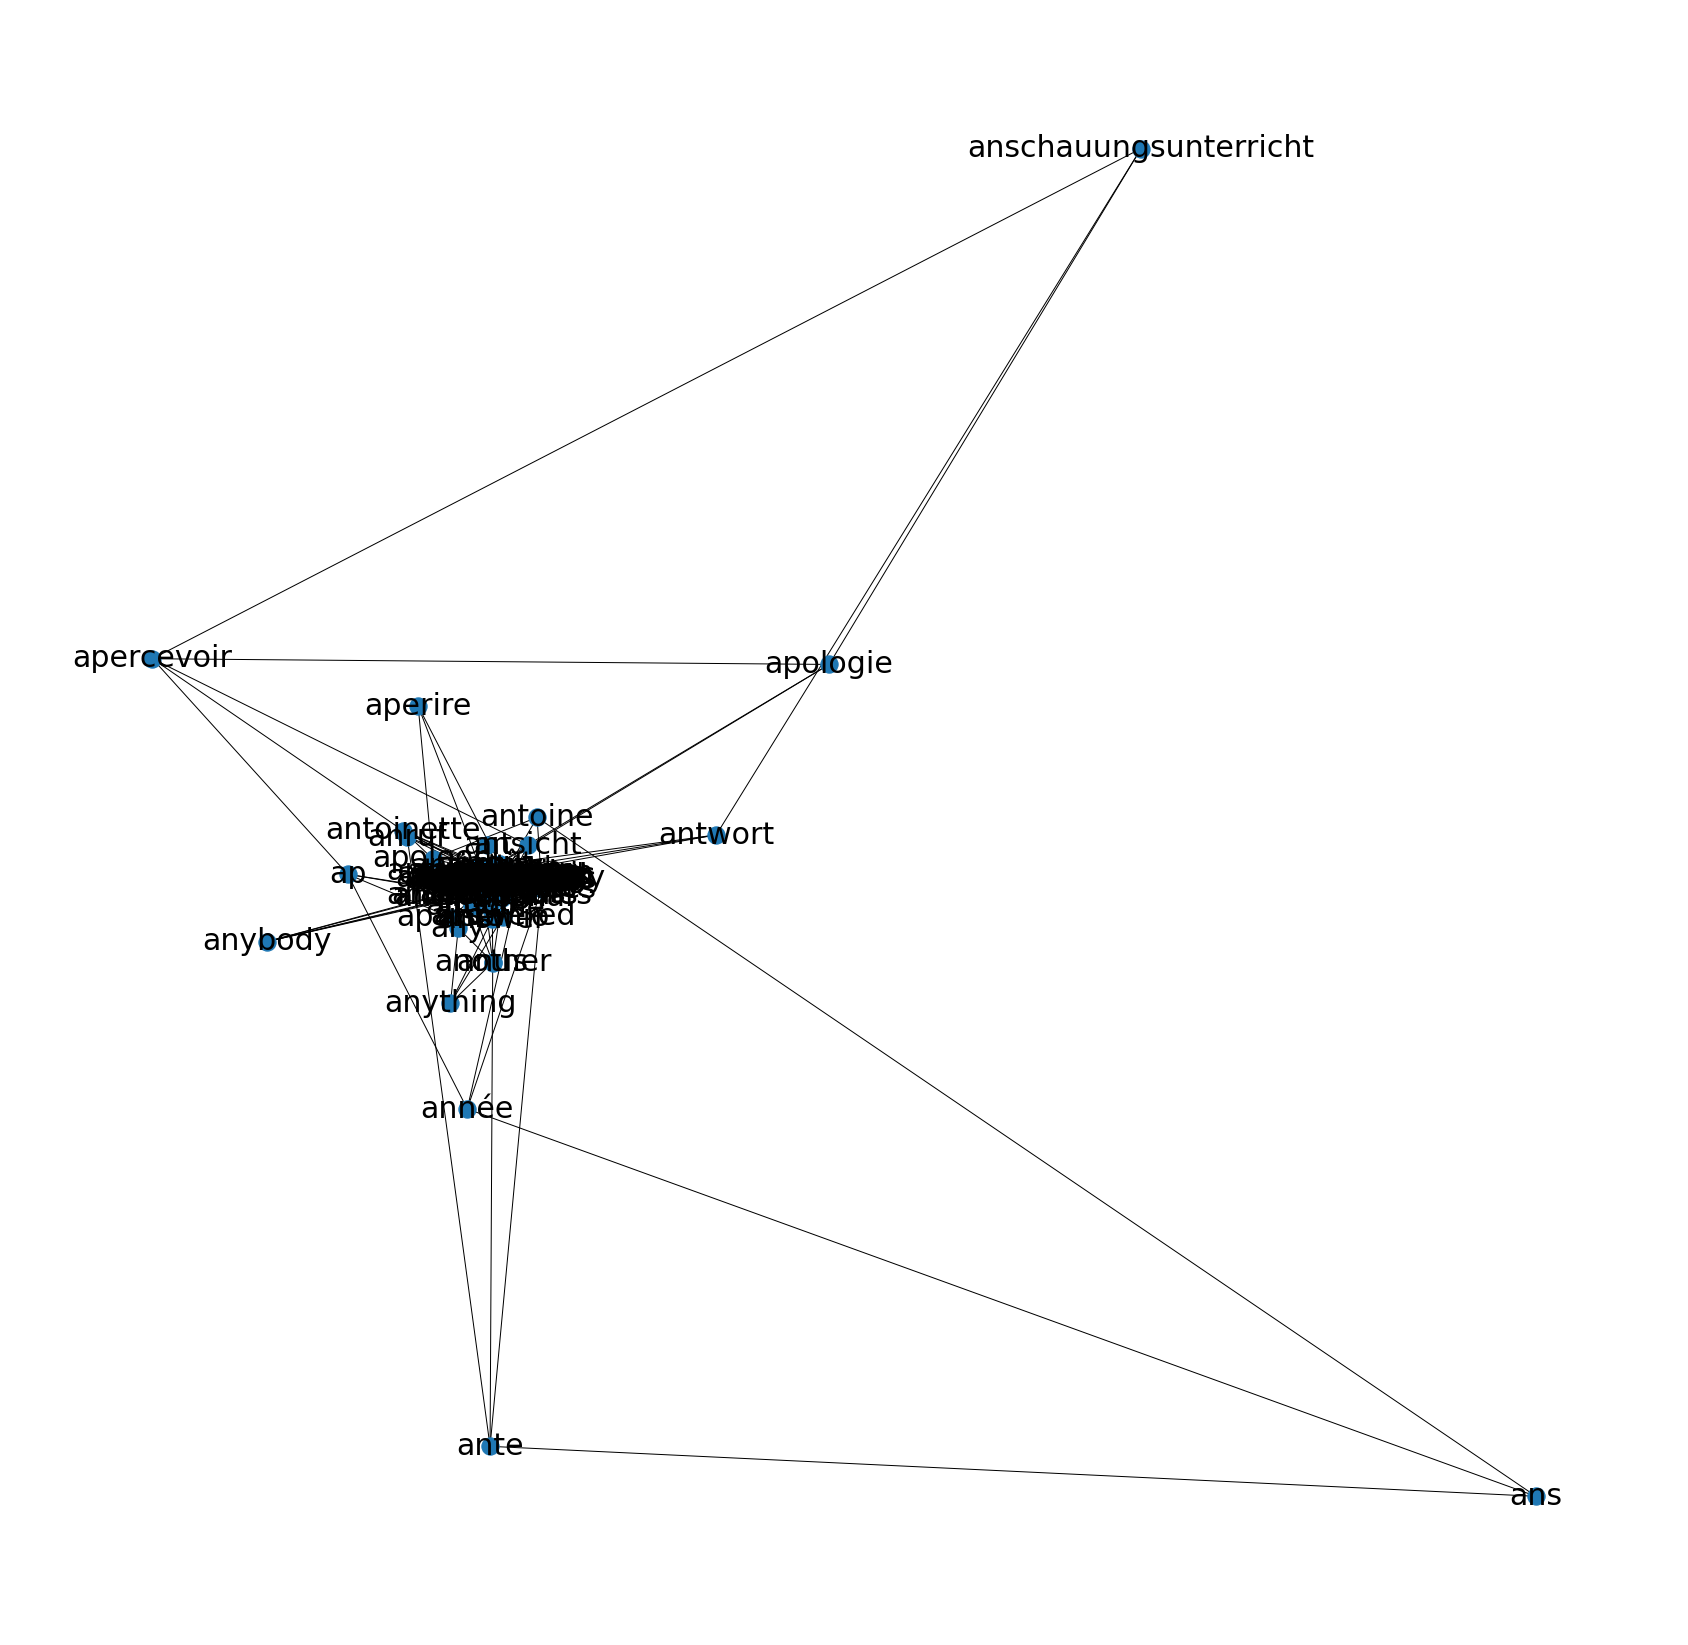

In [12]:
graph = KNNGraph.from_word2vec(word2vec100, knn=3, k=2)
graph.plot()

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 490.40it/s]


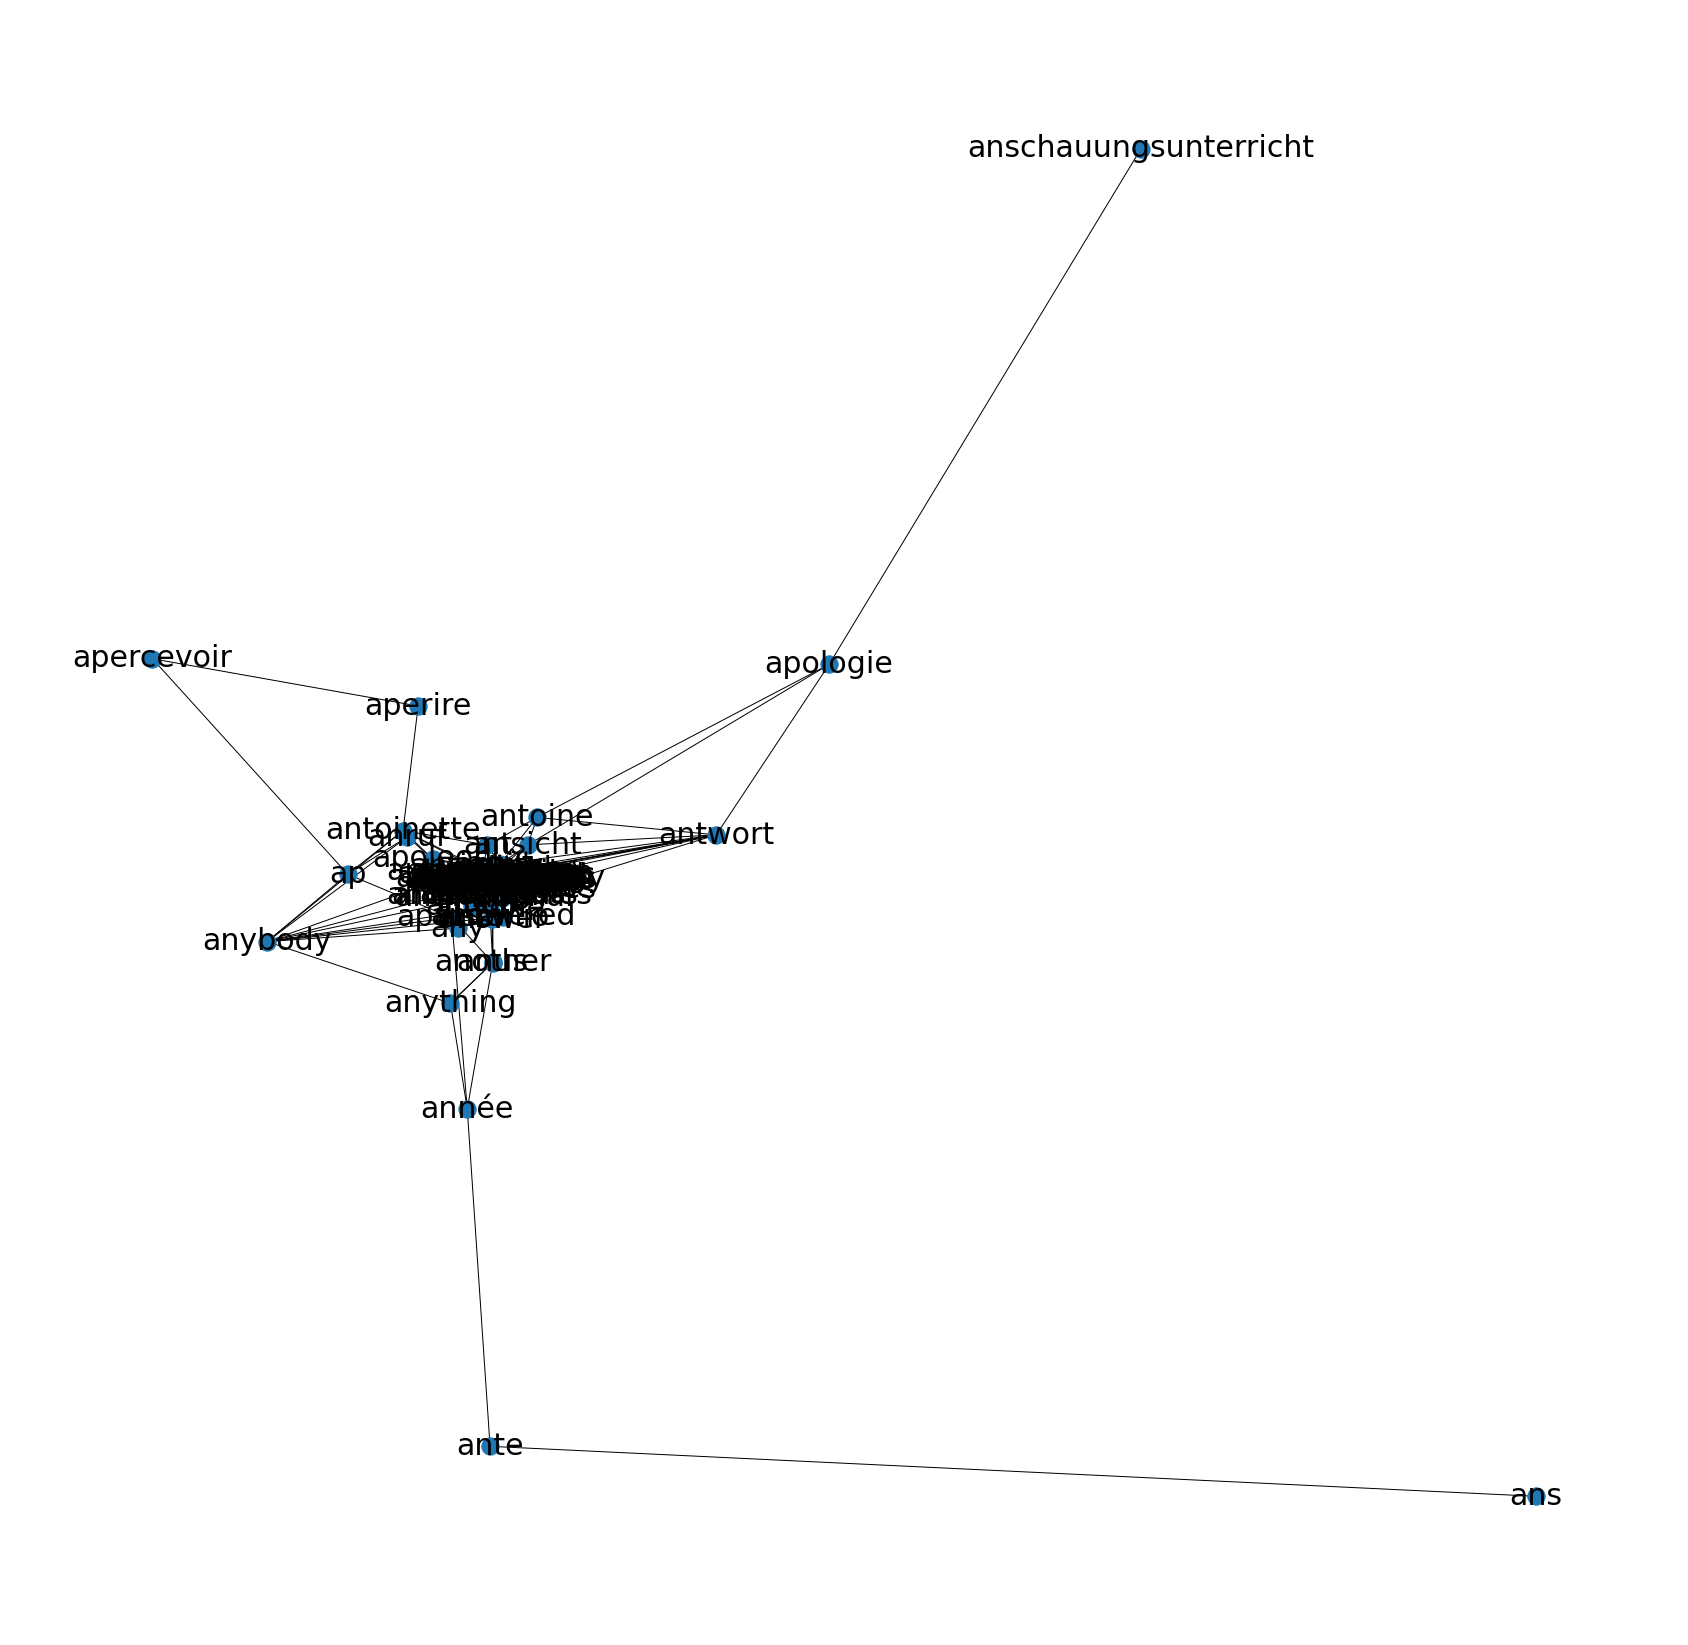

In [13]:
graph = RNGGraph.from_word2vec(word2vec100, k=2)
graph.plot()

100%|████████████████████████████████████████| 100/100 [00:00<00:00, 461.20it/s]


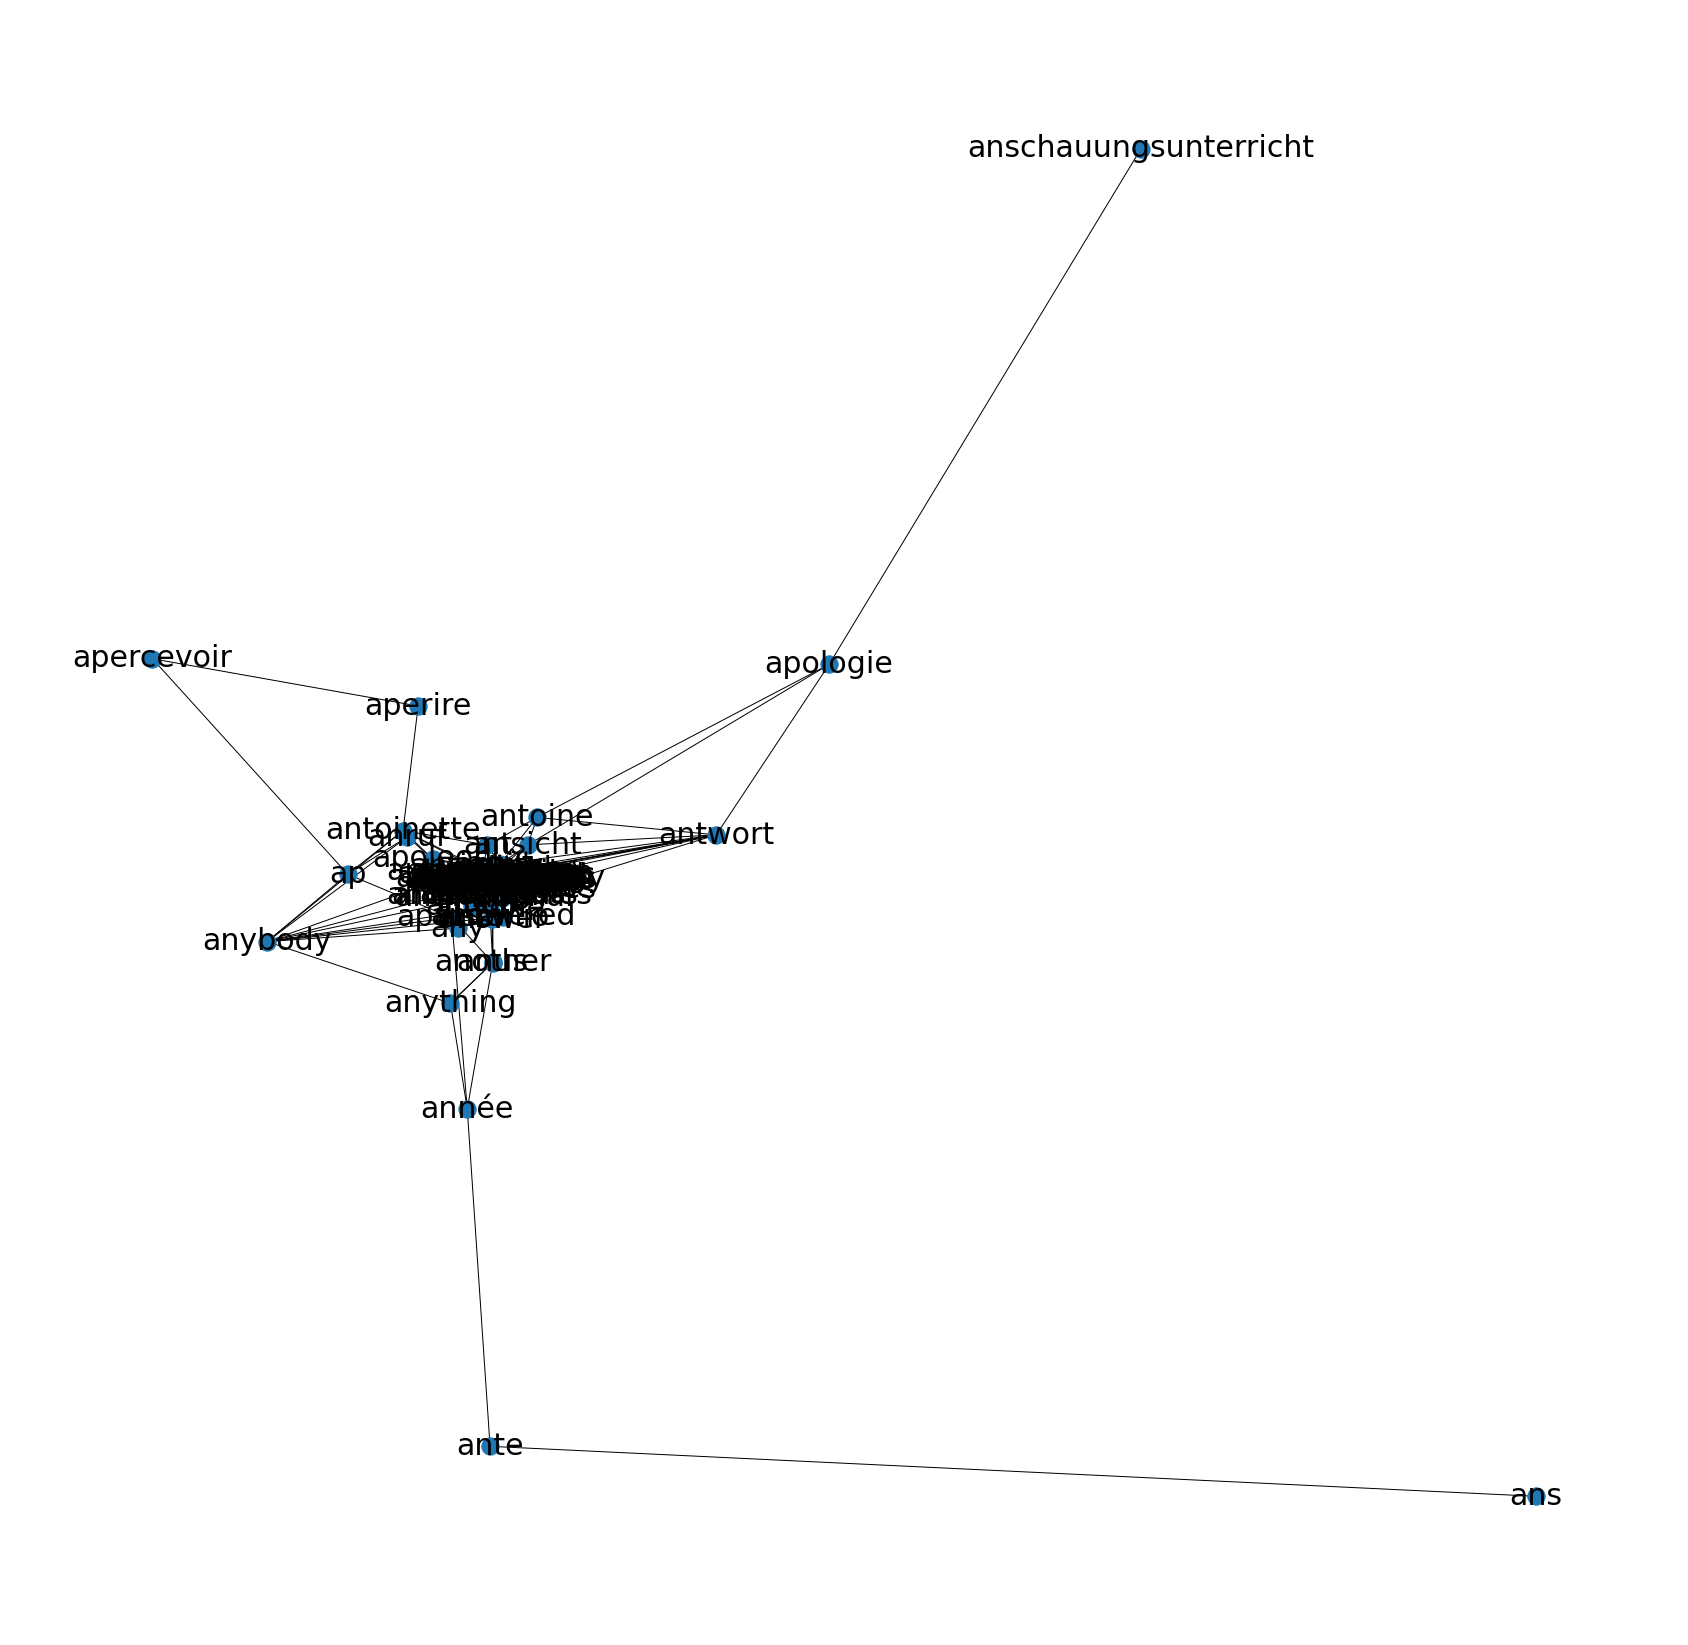

In [14]:
gabriel_graph = read('gg.pickle')
graph = RNGGraph.from_gabriel_graph(gabriel_graph, k=2)
graph.plot()